# 1. Importar las librerías necesarias

In [1]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# 2. Definir los directorios de entrenamiento y validación

In [11]:
train_dir = '../data/Train'  # Regresa una carpeta hacia arriba
validation_dir = '../data/Validation'


In [12]:
import os
print("Directorio actual:", os.getcwd())


Directorio actual: c:\Users\ASUS\OneDrive - Politécnico Grancolombiano\Documentos\ProyectosDeProgramación\MendezAgroDetect\scripts


In [14]:
import os

# Usando rutas relativas que suben un nivel hacia 'data'
train_dir = '../data/Train'
validation_dir = '../data/Validation'

# Verificar los contenidos de las carpetas
print("Contenido de 'Train':", os.listdir(train_dir))
print("Contenido de 'Validation':", os.listdir(validation_dir))


Contenido de 'Train': ['Healthy', 'Powdery', 'Rust']
Contenido de 'Validation': ['Healthy', 'Powdery', 'Rust']


# 3. Configurar ImageDataGenerator para preprocesar y aumentar las imágenes en el entrenamiento

In [15]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
validation_datagen = ImageDataGenerator(rescale=1.0/255)

# 4. Crear generadores para entrenamiento y validación

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

Found 1322 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


# 5. Construir el modelo de red neuronal convolucional (CNN)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Creación del modelo
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 3 clases para las enfermedades
])


c:\Users\ASUS\OneDrive - Politécnico Grancolombiano\Documentos\ProyectosDeProgramación\MendezAgroDetect\venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# 6. Compilar el modelo

In [19]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 7. Entrenar el modelo

In [21]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    train_generator,
    epochs=50,  # Comienza con un número mayor de épocas
    validation_data=validation_generator,
    callbacks=[early_stopping]
)


Epoch 1/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.8506 - loss: 0.4636 - val_accuracy: 0.7500 - val_loss: 0.5801
Epoch 2/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 95s 2s/step - accuracy: 0.8861 - loss: 0.3545 - val_accuracy: 0.9167 - val_loss: 0.3019
Epoch 3/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step - accuracy: 0.8834 - loss: 0.3039 - val_accuracy: 0.8833 - val_loss: 0.2833
Epoch 4/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 93s 2s/step - accuracy: 0.9218 - loss: 0.2575 - val_accuracy: 0.8500 - val_loss: 0.4336
Epoch 5/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 95s 2s/step - accuracy: 0.8742 - loss: 0.3559 - val_accuracy: 0.9500 - val_loss: 0.1965
Epoch 6/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 93s 2s/step - accuracy: 0.9019 - loss: 0.2783 - val_accuracy: 0.9167 - val_loss: 0.2843
Epoch 7/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 94s 2s/step - accuracy: 0.9389 - loss: 0.2191 - val_accuracy: 0.9167 - val_loss: 0.2352
Epoch 8/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.9095 - loss: 0.2443 - val_accuracy: 0.9167 - val_loss

# 8. Mostrar las gráficas de precisión y pérdida

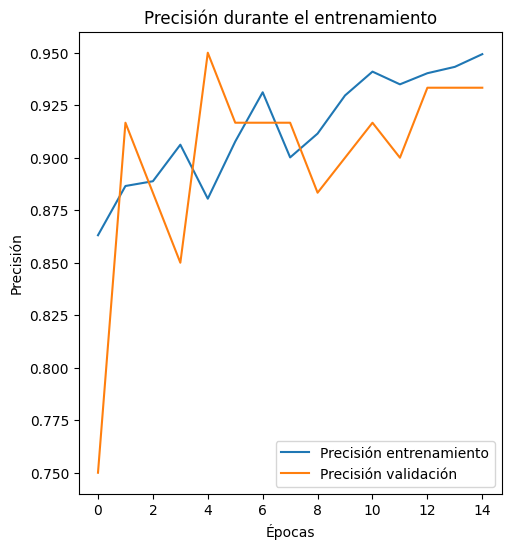

In [22]:
plt.figure(figsize=(12, 6))

# Gráfica de precisión
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# Gráfica de pérdida

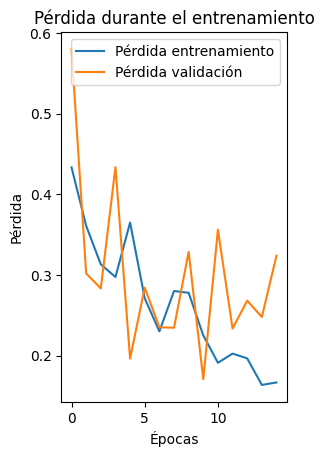

In [23]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

In [24]:
# Mostrar las gráficas
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

#   Matriz de Confusión

2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step


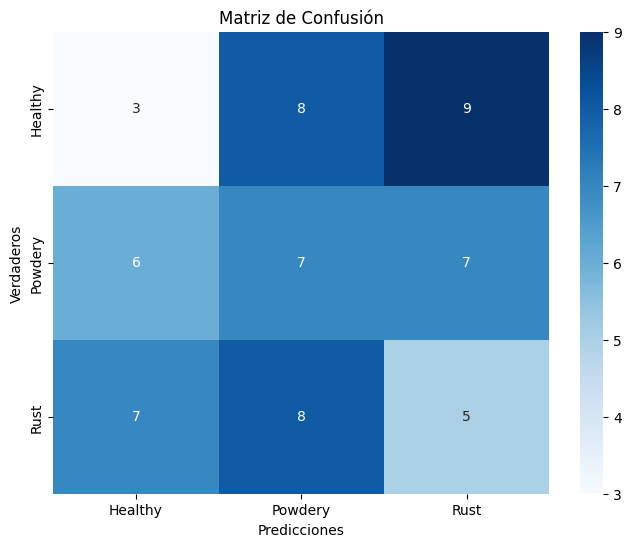

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Realizar predicciones en el conjunto de validación
predictions = model.predict(validation_generator, steps=validation_generator.samples // validation_generator.batch_size + 1, verbose=1)

# Convertir las predicciones a etiquetas de clase
predicted_classes = predictions.argmax(axis=-1)

# Obtener las clases verdaderas
true_classes = validation_generator.classes

# Asegurarse de que el número de muestras sea el mismo
assert len(predicted_classes) == len(true_classes), f"El número de predicciones ({len(predicted_classes)}) no coincide con el número de clases verdaderas ({len(true_classes)})"

# Crear la matriz de confusión
cm = confusion_matrix(true_classes, predicted_classes)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=validation_generator.class_indices.keys(), yticklabels=validation_generator.class_indices.keys())
plt.xlabel('Predicciones')
plt.ylabel('Verdaderos')
plt.title('Matriz de Confusión')
plt.show()




# Curva ROC y AUC

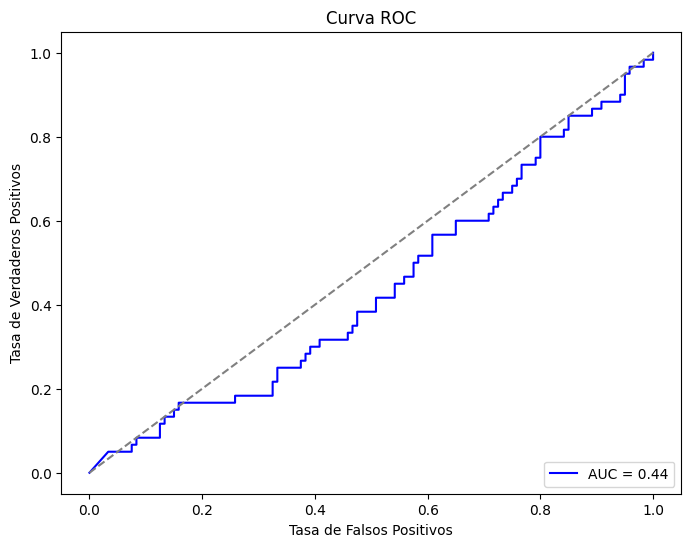

In [30]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer

# Binarizar las clases verdaderas
lb = LabelBinarizer()
y_true = lb.fit_transform(true_classes)

# Calcular las curvas ROC y AUC para cada clase
fpr, tpr, thresholds = roc_curve(y_true.ravel(), predictions.ravel())
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()


# 9. Guardar el modelo entrenado

In [31]:
model.save('model.h5')

# 10. Evaluar el modelo

In [33]:
# Evaluar el modelo en el conjunto de validación
loss, accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // validation_generator.batch_size, verbose=1)

# Mostrar los resultados
print(f'Pérdida en el conjunto de validación: {loss}')
print(f'Precisión en el conjunto de validación: {accuracy}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.8750 - loss: 0.2571
Pérdida en el conjunto de validación: 0.2570738196372986
Precisión en el conjunto de validación: 0.875
